In [51]:
%pip install pandas openpyxl matplotlib seaborn

import pandas as pd
import openpyxl as px
import os
import matplotlib.pyplot as plt
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


In [ ]:
# Specify the path to the Excel file
excel_file_path = 'Graduados de la UPSA.xlsx'

# Read all sheets and merge them
def merge_excel_sheets(file_path):
    # Read the Excel file with all sheets
    xls = pd.ExcelFile(file_path)
    
    # List to store DataFrames from each sheet
    dfs = []
    
    # Iterate through all sheets
    for sheet_name in xls.sheet_names:
        # Read each sheet, selecting only the first 4 columns
        df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=['Nombre', 'Carrera', 'Fecha Defensa', 'Año'])
        
        # Add a column to track the original sheet name if needed
        df['Sheet_Origin'] = sheet_name
        
        # Append to the list of DataFrames
        dfs.append(df)
    
    # Concatenate all DataFrames vertically
    merged_df = pd.concat(dfs, ignore_index=True)
    
    return merged_df

# Merge the sheets
merged_dataframe = merge_excel_sheets(excel_file_path)

# Optional: Display basic information about the merged DataFrame
print(f"Total number of records: {len(merged_dataframe)}")
print("\nFirst few rows:")
print(merged_dataframe.head())

# Optional: Save the merged DataFrame to a new Excel file
# merged_dataframe.to_excel('Merged_Graduados.xlsx', index=False)

Total number of records: 10257

First few rows:
                          Nombre                                 Carrera  \
0           ANTELO SCOTT ROBERTO  COMUNICACION ESTRATEGICA Y CORPORATIVA   
1     ARIAS MEDINA SUSANA ESTHER  COMUNICACION ESTRATEGICA Y CORPORATIVA   
2      ROCA URIOSTE VANYA MÓNICA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
3  SANJINÉS ZACONETA PEGGY ERIKA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
4     CORTEZ UZEDA MARCO ANTONIO              ADMINISTRACION DE EMPRESAS   

  Fecha Defensa   Año Sheet_Origin  
0    1988-12-15  1988    Table 163  
1    1988-12-15  1988    Table 163  
2    1988-12-14  1988    Table 163  
3    1988-12-14  1988    Table 163  
4    1988-12-14  1988    Table 162  


In [ ]:
# Use the new Excel with the merged data for further analysis
merged_dataframe = pd.read_excel('Merged_Graduados.xlsx')
print(merged_dataframe.head())

# Print all values in the 'Carrera' column
print(merged_dataframe['Carrera'].unique())

                          Nombre                                 Carrera  \
0           ANTELO SCOTT ROBERTO  COMUNICACION ESTRATEGICA Y CORPORATIVA   
1     ARIAS MEDINA SUSANA ESTHER  COMUNICACION ESTRATEGICA Y CORPORATIVA   
2      ROCA URIOSTE VANYA MÓNICA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
3  SANJINÉS ZACONETA PEGGY ERIKA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
4     CORTEZ UZEDA MARCO ANTONIO              ADMINISTRACION DE EMPRESAS   

  Fecha Defensa   Año Sheet_Origin  
0    1988-12-15  1988    Table 163  
1    1988-12-15  1988    Table 163  
2    1988-12-14  1988    Table 163  
3    1988-12-14  1988    Table 163  
4    1988-12-14  1988    Table 162  
['COMUNICACION ESTRATEGICA Y CORPORATIVA' 'ADMINISTRACION DE EMPRESAS'
 'INGENIERIA DE SISTEMAS' 'DECORACION DE INTERIORES Y PAISAJISMO'
 'ANALISIS Y PROGRAMACION DE SISTEMAS' 'DISENO GRAFICO Y PUBLICITARIO'
 'CONTADURIA GENERAL' 'PERIODISMO' 'ARQUITECTURA' 'INGENIERIA COMERCIAL'
 'DERECHO' 'CONSTRUCCIONES' 'AUDITORIA Y

In [ ]:
print("Unique values before cleaning:")
unique_careers = merged_dataframe["Carrera"].unique()

# Careers sorted alphabetically
print("\n".join(sorted(unique_careers)))


def clean_career_names(df):
    df["Carrera"] = df["Carrera"].replace(
        {
            "COMUNICACION ESTRATEGICA Y CORPORATIVA": "Comunicación Estratégica Y Corporativa",
            "ADMINISTRACION DE EMPRESAS": "Administración De Empresas",
            "INGENIERIA DE SISTEMAS": "Ingeniería De Sistemas",
            "DECORACION DE INTERIORES Y PAISAJISMO": "Decoración De Interiores Y Paisajismo",
            "ANALISIS Y PROGRAMACION DE SISTEMAS": "Análisis Y Programación De Sistemas",
            "DISENO GRAFICO Y PUBLICITARIO": "Diseño Gráfico Y Publicitario",
            "CONTADURIA GENERAL": "Contaduría General",
            "PERIODISMO": "Periodismo",
            "ARQUITECTURA": "Arquitectura",
            "INGENIERIA COMERCIAL": "Ingeniería Comercial",
            "DERECHO": "Derecho",
            "CONSTRUCCIONES": "Construcciones",
            "AUDITORIA Y FINANZAS": "Auditoría Y Finanzas",
            "INGENIERIA ECONOMICA": "Ingeniería Económica",
            "INGENIERIA INFORMATICA ADMINISTRATIVA": "Ingeniería Informática Y Administrativa",
            "INGENIERIA INDUSTRIAL Y DE SISTEMAS": "Ingeniería Industrial Y De Sistemas",
            "INGENIERIA CIVIL": "Ingeniería Civil",
            "PSICOLOGIA": "Psicología",
            "DISENO GRAFICO": "Diseño Gráfico",
            "COMERCIO INTERNACIONAL": "Comercio Internacional",
            "INGENIERIA FINANCIERA": "Ingeniería Financiera",
            "INGENIERIA ELECTRONICA": "Ingeniería Electrónica",
            "MARKETING Y PUBLICIDAD": "Marketing Y Publicidad",
            "DISENO DE INTERIORES": "Diseño De Interiores",
            "DISENO Y GESTION DE LA MODA": "Diseño Y Gestión De La Moda",
            "INGENIERIA DE PETROLEO Y GAS NATURAL": "Ingeniería De Petróleo Y Gas Natural",
            "INGENIERIA DE REDES Y TELECOMUNICACIONES": "Ingeniería De Redes Y Telecomunicaciones",
            "DISENO INDUSTRIAL": "Diseño Industrial",
            "INGENIERIA INDUSTRIAL EN MADERA": "Ingeniería Industrial En Madera",
            "INGENIERÍA CIVIL": "Ingeniería Civil",
            "INGENIERÍA DE PETR—LEO Y GAS NATURAL": "Ingeniería De Petróleo Y Gas Natural",
            "INGENIERÍA DE SISTEMAS": "Ingeniería De Sistemas",
            "INGENIERÍA ELECTR—NICA": "Ingeniería Electrónica",
            "INGENIERÍA EN REDES Y TELECOMUNICACIONES": "Ingeniería En Redes Y Telecomunicaciones",
            "INGENIERÍA INDUSTRIAL Y DE SISTEMAS": "Ingeniería Industrial Y De Sistemas",
            "COMUNICACIÓN ESTRATÉGICA Y CORPORATIVA": "Comunicación Estratégica Y Corporativa",
            "DISEÑO GRÁFICO": "Diseño Gráfico",
            "DISEÑO Y GESTIÓN DE LA MODA": "Diseño Y Gestión De La Moda",
            "PSICOLOGÍA": "Psicología",
            "ADMINISTRACIÓN DE EMPRESAS": "Administración De Empresas",
            "INGENIERÍA COMERCIAL": "Ingeniería Comercial",
            "INGENIERÍA ECON—MICA": "Ingeniería Económica",
            "INGENIERÍA FINANCIERA": "Ingeniería Financiera",
            "DISEÑO INDUSTRIAL": "Diseño Industrial",
            "INGENIERÍA DE INDUSTRIAL Y DE SISTEMAS": "Ingeniería Industrial Y De Sistemas",
            "INGENIERÍA DE PETRÓLEO Y GAS NATURAL": "Ingeniería De Petróleo Y Gas Natural",
            "INGENIERÍA DE REDES Y TELECOMUNICACIONES": "Ingeniería De Redes Y Telecomunicaciones",
            "INGENIERIA E ELECTRîNICA": "Ingeniería Electrónica",
            "INGENIERÍA ELECTRÓNICA": "Ingeniería Electrónica",
            "INGENIERÍA INDUSTRIAL EN MADERA": "Ingeniería Industrial En Madera",
            "INGENIERIA INFORMATICA Y ADMINISTRATIVA": "Ingeniería Informática Administrativa",
            "PSICOLOGêA": "Psicología",
            "AUDITORÍA Y FINANZAS": "Auditoría Y Finanzas",
            "INGENIERÍA ECONÓMICA": "Ingeniería Económica",
            "INGENIERIA EN MADERA": "Ingeniería En Madera",
            "INGENIERIA EN PETROLEO  Y GAS NATURAL": "Ingeniería De Petróleo Y Gas Natural",
            "DISEÑO GRAFICO": "Diseño Gráfico",
            "DISEÑO Y GESTIîN DE LA MODA": "Diseño Y Gestión De La Moda",
            "INGENIERIA ECONîMICA": "Ingeniería Económica",
            "Ingeniería Informática y Administrativa": "Ingeniería Informática Administrativa",
            "Ingeniería Civil": "Ingeniería Civil",
            "Ingenieria Civil": "Ingeniería Civil",
            "Ingenieria De Petróleo Y Gas Natural": "Ingeniería De Petróleo Y Gas Natural",
            "Ingeniería De Petróleo Y Gas Natural": "Ingeniería De Petróleo Y Gas Natural",
            "Ingeniería De Redes Y Telecomunicaciones": "Ingeniería De Redes Y Telecomunicaciones",
            "Ingenieria De Sistemas": "Ingeniería De Sistemas",
            "Ingeniería Electrónica": "Ingeniería Electrónica",
            "Ingenieria Electrónica": "Ingeniería Electrónica",
            "Ingenieria Industrial Y De Sistemas": "Ingeniería Industrial Y De Sistemas",
            "Ingeniería Industrial Y De Sistemas": "Ingeniería Industrial Y De Sistemas",
            "Ingeniería Informática Administrativa": "Ingeniería Informática Administrativa",
            "Comunicación Estratégica Y Corporativa": "Comunicación Estratégica Y Corporativa",
            "Diseño Grafico": "Diseño Gráfico",
            "Diseño Y Gestión De La Moda": "Diseño Y Gestión De La Moda",
            "Psicología": "Psicología",
            "Derecho": "Derecho",
            "Administración De Empresas": "Administración De Empresas",
            "Auditoria Y Finanzas": "Auditoría Y Finanzas",
            "Comercio Internacional": "Comercio Internacional",
            "Ingeniería Comercial": "Ingeniería Comercial",
            "Ingenieria Comercial": "Ingeniería Comercial",
            "Ingeniería Económica": "Ingeniería Económica",
            "Ingenieria Económica": "Ingeniería Económica",
            "Ingenieria Financiera": "Ingeniería Financiera",
            "Ingeniería Financiera": "Ingeniería Financiera",
            "Marketing Y Publicidad": "Marketing Y Publicidad",
            "Arquitectura": "Arquitectura",
            "Diseño Industrial": "Diseño Industrial",
            "ingeniería Civil": "Ingeniería Civil",
            "INGENIERIA INFORMÁTICA ADMINISTRATIVA": "Ingeniería Informática Administrativa",
            "INGENIERÍA INFORMÁTICA ADMINISTRATIVA": "Ingeniería Informática Administrativa",
            "Ingeniería Informática Y Administrativa": "Ingeniería Informática Administrativa",
        }
    )

    return df


merged_dataframe = clean_career_names(merged_dataframe)

print("\n\nUnique values after cleaning:")
after_cleaning = merged_dataframe["Carrera"].unique()
print("\n".join(sorted(after_cleaning)))

# Save the cleaned data to a new Excel file
merged_dataframe.to_excel('Cleaned_Graduados.xlsx', index=False)

Unique values before cleaning:
Administración De Empresas
Análisis Y Programación De Sistemas
Arquitectura
Auditoría Y Finanzas
Comercio Internacional
Comunicación Estratégica Y Corporativa
Construcciones
Contaduría General
Decoración De Interiores Y Paisajismo
Derecho
Diseño De Interiores
Diseño Gráfico
Diseño Gráfico Y Publicitario
Diseño Industrial
Diseño Y Gestión De La Moda
Ingeniería Civil
Ingeniería Comercial
Ingeniería De Petróleo Y Gas Natural
Ingeniería De Redes Y Telecomunicaciones
Ingeniería De Sistemas
Ingeniería Económica
Ingeniería Electrónica
Ingeniería En Madera
Ingeniería En Redes Y Telecomunicaciones
Ingeniería Financiera
Ingeniería Industrial En Madera
Ingeniería Industrial Y De Sistemas
Ingeniería Informática Administrativa
Ingeniería Informática Y Administrativa
Marketing Y Publicidad
Periodismo
Psicología


Unique values after cleaning:
Administración De Empresas
Análisis Y Programación De Sistemas
Arquitectura
Auditoría Y Finanzas
Comercio Internacional
Comunica

In [ ]:
faculties_mapping = {
    "Administración De Empresas": "Ciencias Empresariales",
    "Análisis Y Programación De Sistemas": "Ingeniería",
    "Arquitectura": "Arquitectura, Diseño Y Urbanismo",
    "Auditoría Y Finanzas": "Ciencias Empresariales",
    "Comercio Internacional": "Ciencias Empresariales",
    "Comunicación Estratégica Y Corporativa": "Humanidades, Comunicaciones Y Artes",
    "Construcciones": "Ingeniería",
    "Contaduría General": "Ciencias Empresariales",
    "Decoración De Interiores Y Paisajismo": "Arquitectura, Diseño Y Urbanismo",
    "Derecho": "Ciencias Jurídicas Y Sociales",
    "Diseño De Interiores": "Arquitectura, Diseño Y Urbanismo",
    "Diseño Gráfico": "Humanidades, Comunicaciones Y Artes",
    "Diseño Gráfico Y Publicitario": "Humanidades, Comunicaciones Y Artes",
    "Diseño Industrial": "Arquitectura, Diseño Y Urbanismo",
    "Diseño Y Gestión De La Moda": "Humanidades, Comunicaciones Y Artes",
    "Ingeniería Civil": "Ingeniería",
    "Ingeniería Comercial": "Ciencias Empresariales",
    "Ingeniería De Petróleo Y Gas Natural": "Ingeniería",
    "Ingeniería De Redes Y Telecomunicaciones": "Ingeniería",
    "Ingeniería De Sistemas": "Ingeniería",
    "Ingeniería Económica": "Ciencias Empresariales",
    "Ingeniería Electrónica": "Ingeniería",
    "Ingeniería En Madera": "Ingeniería",
    "Ingeniería En Redes Y Telecomunicaciones": "Ingeniería",
    "Ingeniería Financiera": "Ciencias Empresariales",
    "Ingeniería Industrial En Madera": "Ingeniería",
    "Ingeniería Industrial Y De Sistemas": "Ingeniería",
    "Ingeniería Informática Administrativa": "Ingeniería",
    "Marketing Y Publicidad": "Ciencias Empresariales",
    "Periodismo": "Humanidades, Comunicaciones Y Artes",
    "Psicología": "Humanidades, Comunicaciones Y Artes"
}

merged_dataframe["Facultad"]=merged_dataframe["Carrera"].map(faculties_mapping)

# Display unique values after cleaning
print("\n\nUnique values after cleaning:")
after_cleaning = merged_dataframe["Carrera"].unique()
print("\n".join(sorted(after_cleaning)))

# Display the first few rows of the updated DataFrame
print("\nFirst few rows of the updated DataFrame:")
print(merged_dataframe.head())

# Save the cleaned data to a new Excel file
merged_dataframe.to_excel('Cleaned_Graduados_with_Faculties.xlsx', index=False)



Unique values after cleaning:
Administración De Empresas
Análisis Y Programación De Sistemas
Arquitectura
Auditoría Y Finanzas
Comercio Internacional
Comunicación Estratégica Y Corporativa
Construcciones
Contaduría General
Decoración De Interiores Y Paisajismo
Derecho
Diseño De Interiores
Diseño Gráfico
Diseño Gráfico Y Publicitario
Diseño Industrial
Diseño Y Gestión De La Moda
Ingeniería Civil
Ingeniería Comercial
Ingeniería De Petróleo Y Gas Natural
Ingeniería De Redes Y Telecomunicaciones
Ingeniería De Sistemas
Ingeniería Económica
Ingeniería Electrónica
Ingeniería En Madera
Ingeniería En Redes Y Telecomunicaciones
Ingeniería Financiera
Ingeniería Industrial En Madera
Ingeniería Industrial Y De Sistemas
Ingeniería Informática Administrativa
Marketing Y Publicidad
Periodismo
Psicología

First few rows of the updated DataFrame:
                          Nombre                                 Carrera  \
0           ANTELO SCOTT ROBERTO  Comunicación Estratégica Y Corporativa   
1    

In [ ]:
# Analysis of the data
# Year with the most graduates
year_counts = merged_dataframe["Año"].value_counts()
print("\nYear with the most graduates:")
print(year_counts)


Year with the most graduates:
Año
2002    660
2001    512
2004    465
2017    459
2019    438
2018    434
2016    426
2005    422
2015    420
2003    400
2008    399
2021    397
2000    376
2022    372
1999    362
2011    357
2014    353
2013    343
2006    340
2020    318
2009    316
2012    268
1998    263
2007    259
1997    176
2010    141
1996    141
1995    133
1994     72
1992     65
1993     61
1990     48
1991     38
1989     17
1988      6
Name: count, dtype: int64


C:\Users\Jassiel\AppData\Local\Temp\ipykernel_10872\2172879557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


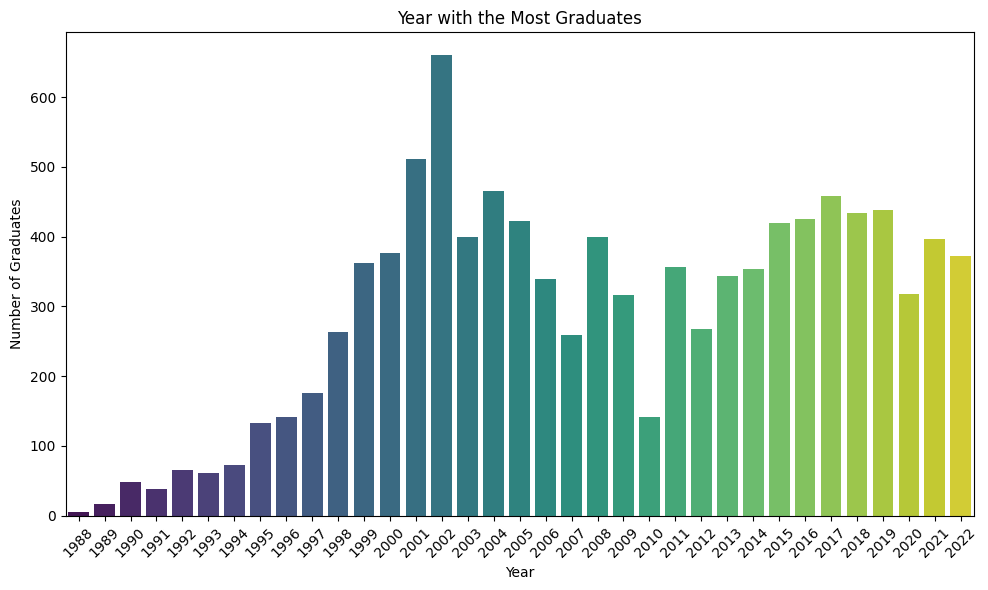

In [52]:
# Plot for the year with the most graduates
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.title("Year with the Most Graduates")
plt.xlabel("Year")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Faculty with the most graduates
faculty_counts = merged_dataframe["Facultad"].value_counts()
print("\nFaculty with the most graduates:")
print(faculty_counts)


Faculty with the most graduates:
Facultad
Ciencias Empresariales                 4142
Ingeniería                             1995
Arquitectura, Diseño Y Urbanismo       1690
Humanidades, Comunicaciones Y Artes    1278
Ciencias Jurídicas Y Sociales          1152
Name: count, dtype: int64


C:\Users\Jassiel\AppData\Local\Temp\ipykernel_10872\2774993294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faculty_counts.values, y=faculty_counts.index, palette="viridis")


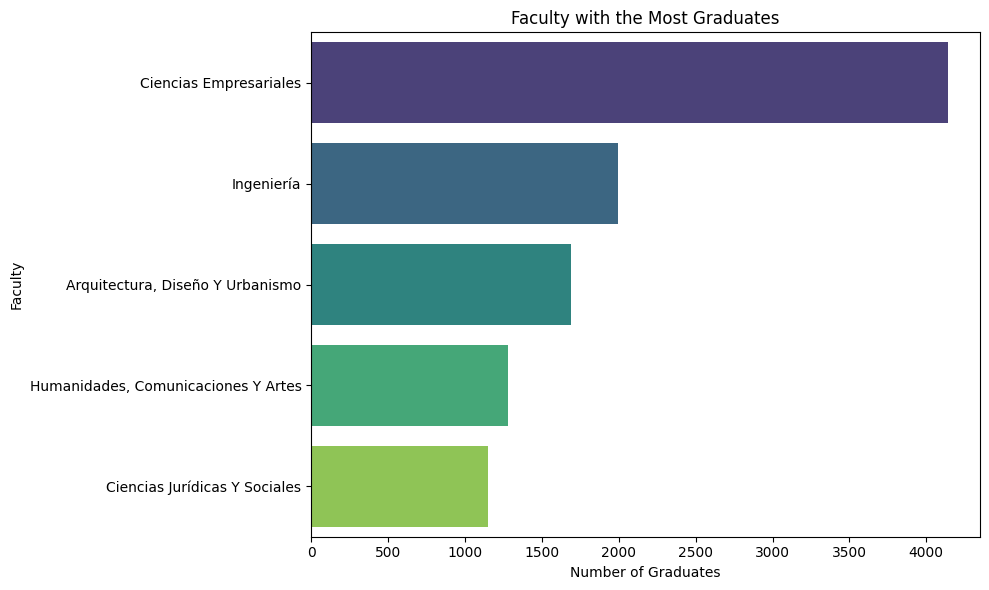

In [53]:
# Plot for the faculty with the most graduates
plt.figure(figsize=(10, 6))
sns.barplot(x=faculty_counts.values, y=faculty_counts.index, palette="viridis")
plt.title("Faculty with the Most Graduates")
plt.xlabel("Number of Graduates")
plt.ylabel("Faculty")
plt.tight_layout()
plt.show()

In [ ]:
# Career with the most graduates
career_counts = merged_dataframe["Carrera"].value_counts()
print("\nCareer with the most graduates:")
print(career_counts)


Career with the most graduates:
Carrera
Ingeniería Comercial                        1477
Arquitectura                                1306
Derecho                                     1152
Administración De Empresas                  1058
Ingeniería Industrial Y De Sistemas          753
Comunicación Estratégica Y Corporativa       458
Ingeniería Económica                         441
Ingeniería Civil                             438
Auditoría Y Finanzas                         374
Ingeniería Financiera                        296
Ingeniería De Sistemas                       294
Decoración De Interiores Y Paisajismo        271
Comercio Internacional                       259
Psicología                                   235
Diseño Gráfico Y Publicitario                201
Marketing Y Publicidad                       201
Diseño Gráfico                               201
Ingeniería De Petróleo Y Gas Natural         188
Ingeniería Electrónica                       138
Diseño Y Gestión De La Moda 

C:\Users\Jassiel\AppData\Local\Temp\ipykernel_10872\3410378374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=career_counts.values, y=career_counts.index, palette="viridis")


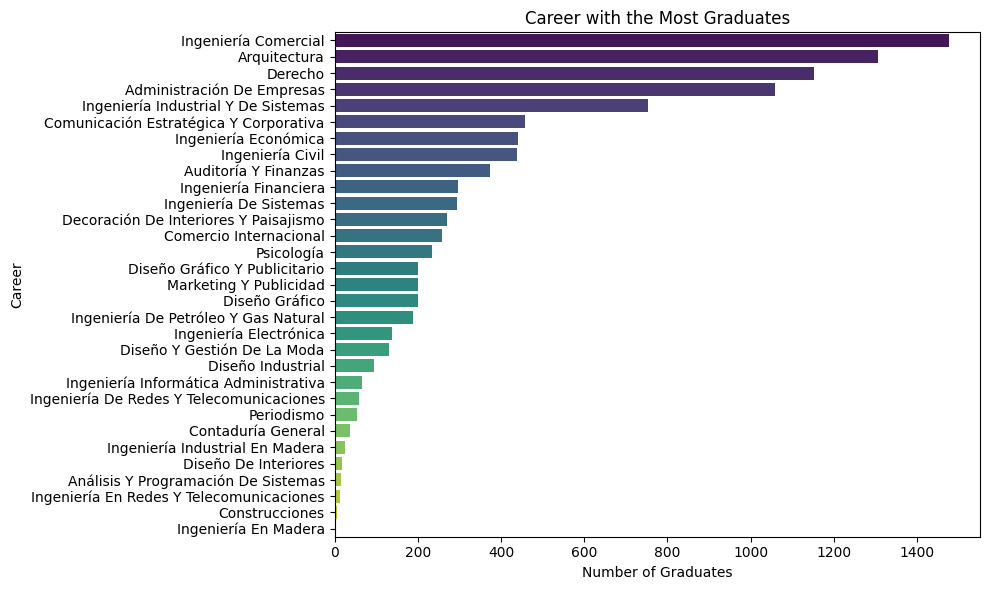

In [54]:
# Plot for the career with the most graduates
plt.figure(figsize=(10, 6))
sns.barplot(x=career_counts.values, y=career_counts.index, palette="viridis")
plt.title("Career with the Most Graduates")
plt.xlabel("Number of Graduates")
plt.ylabel("Career")
plt.tight_layout()
plt.show()

In [ ]:
# Trend of graduates over the years
trend_over_years = merged_dataframe.groupby("Año").size()
print("\nTrend of graduates over the years:")
print(trend_over_years)


Trend of graduates over the years:
Año
1988      6
1989     17
1990     48
1991     38
1992     65
1993     61
1994     72
1995    133
1996    141
1997    176
1998    263
1999    362
2000    376
2001    512
2002    660
2003    400
2004    465
2005    422
2006    340
2007    259
2008    399
2009    316
2010    141
2011    357
2012    268
2013    343
2014    353
2015    420
2016    426
2017    459
2018    434
2019    438
2020    318
2021    397
2022    372
dtype: int64


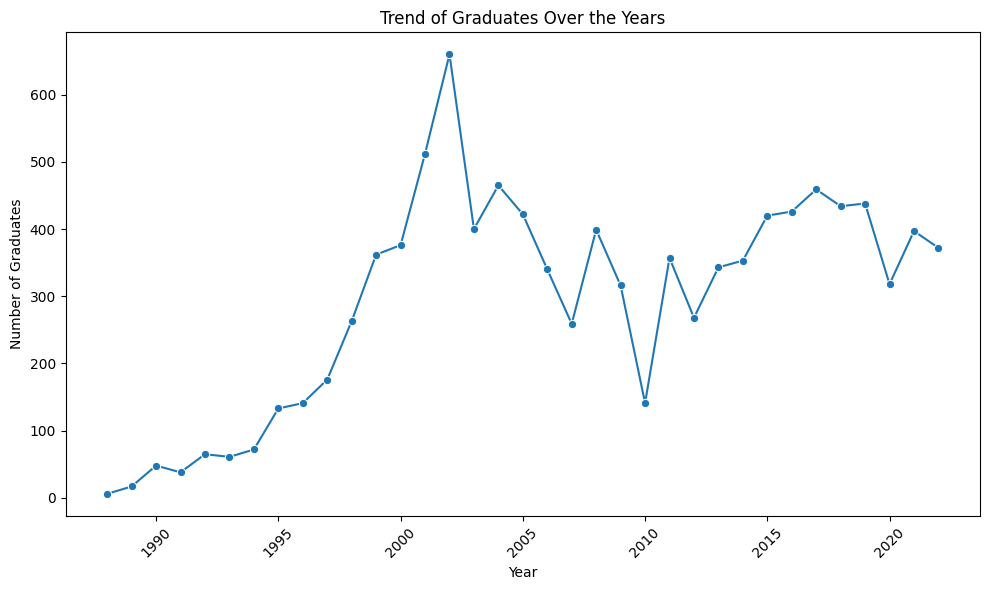

In [55]:
# Plot for the trend of graduates over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=trend_over_years.index, y=trend_over_years.values, marker="o")
plt.title("Trend of Graduates Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Top careers with most graduates
top_careers = career_counts.head(10)
print("\nTop careers with most graduates:")
print(top_careers)


Top careers with most graduates:
Carrera
Ingeniería Comercial                      1477
Arquitectura                              1306
Derecho                                   1152
Administración De Empresas                1058
Ingeniería Industrial Y De Sistemas        753
Comunicación Estratégica Y Corporativa     458
Ingeniería Económica                       441
Ingeniería Civil                           438
Auditoría Y Finanzas                       374
Ingeniería Financiera                      296
Name: count, dtype: int64


C:\Users\Jassiel\AppData\Local\Temp\ipykernel_10872\3203809853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_careers.values, y=top_careers.index, palette="viridis")


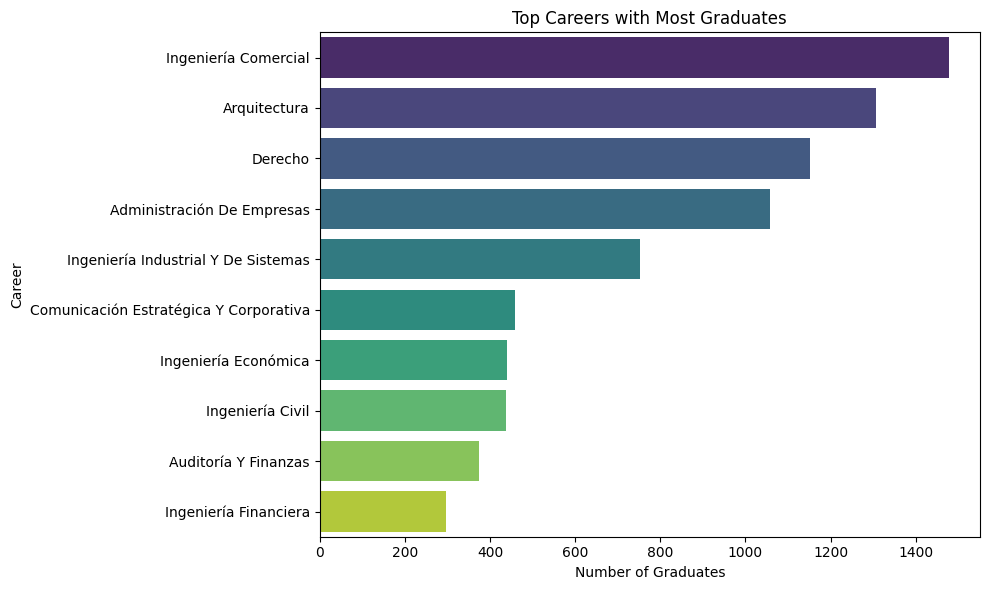

In [61]:
# Plot for the top careers with most graduates
plt.figure(figsize=(10, 6))
sns.barplot(x=top_careers.values, y=top_careers.index, palette="viridis")
plt.title("Top Careers with Most Graduates")
plt.xlabel("Number of Graduates")
plt.ylabel("Career")
plt.tight_layout()
plt.show()

In [ ]:
# Graduates by year and faculty
graduates_by_year_faculty = merged_dataframe.pivot_table(index="Año", columns="Facultad", aggfunc="size", fill_value=0)
print("\nGraduates by year and faculty:")
print(graduates_by_year_faculty)


Graduates by year and faculty:
Facultad  Arquitectura, Diseño Y Urbanismo  Ciencias Empresariales  \
Año                                                                  
1988                                     0                       2   
1989                                    11                       5   
1990                                    17                      10   
1991                                    14                       5   
1992                                    20                      16   
1993                                    25                      16   
1994                                    26                      13   
1995                                    36                      39   
1996                                    37                      31   
1997                                    34                      86   
1998                                    60                     130   
1999                                    78                

In [ ]:
# Plot for graduates by year and faculty
plt.figure(figsize=(12, 8))
sns.heatmap(graduates_by_year_faculty, cmap="viridis", annot=True, fmt="d")
plt.title("Graduates by Year and Faculty")
plt.xlabel("Faculty")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
# Graduates by year and career
graduates_by_year_career = merged_dataframe.pivot_table(index="Año", columns="Carrera", aggfunc="size", fill_value=0)
print("\nGraduates by year and career:")
print(graduates_by_year_career)



Graduates by year and career:
Carrera  Administración De Empresas  Análisis Y Programación De Sistemas  \
Año                                                                        
1988                              2                                    0   
1989                              5                                    0   
1990                              7                                    3   
1991                              4                                    6   
1992                              5                                    5   
1993                              7                                    1   
1994                             12                                    0   
1995                             18                                    0   
1996                             10                                    1   
1997                             37                                    0   
1998                             37                      

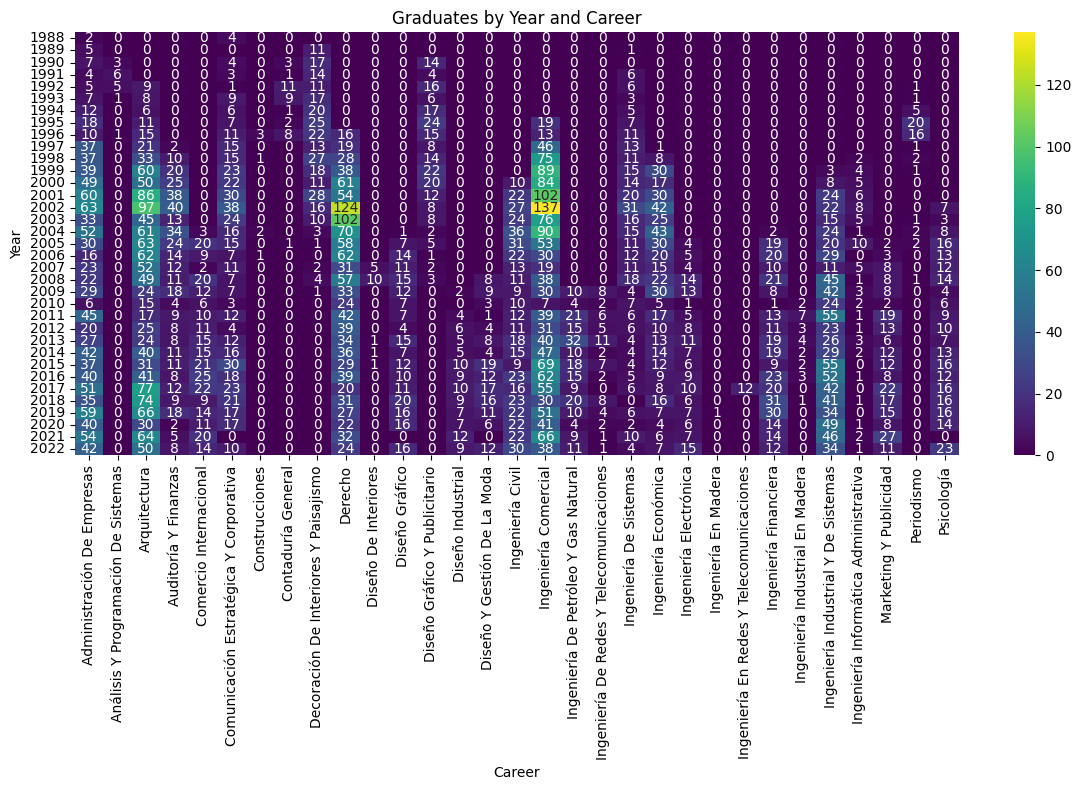

In [56]:
# Plot for graduates by year and career
plt.figure(figsize=(12, 8))
sns.heatmap(graduates_by_year_career, cmap="viridis", annot=True, fmt="d")
plt.title("Graduates by Year and Career")
plt.xlabel("Career")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

In [57]:
# Distribution of graduates by faculty
faculty_counts = merged_dataframe["Facultad"].value_counts()
print("\nDistribution of graduates by faculty:")
print(faculty_counts)


Distribution of graduates by faculty:
Facultad
Ciencias Empresariales                 4142
Ingeniería                             1995
Arquitectura, Diseño Y Urbanismo       1690
Humanidades, Comunicaciones Y Artes    1278
Ciencias Jurídicas Y Sociales          1152
Name: count, dtype: int64


C:\Users\Jassiel\AppData\Local\Temp\ipykernel_10872\3422899771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faculty_counts.index, y=faculty_counts.values, palette="viridis")


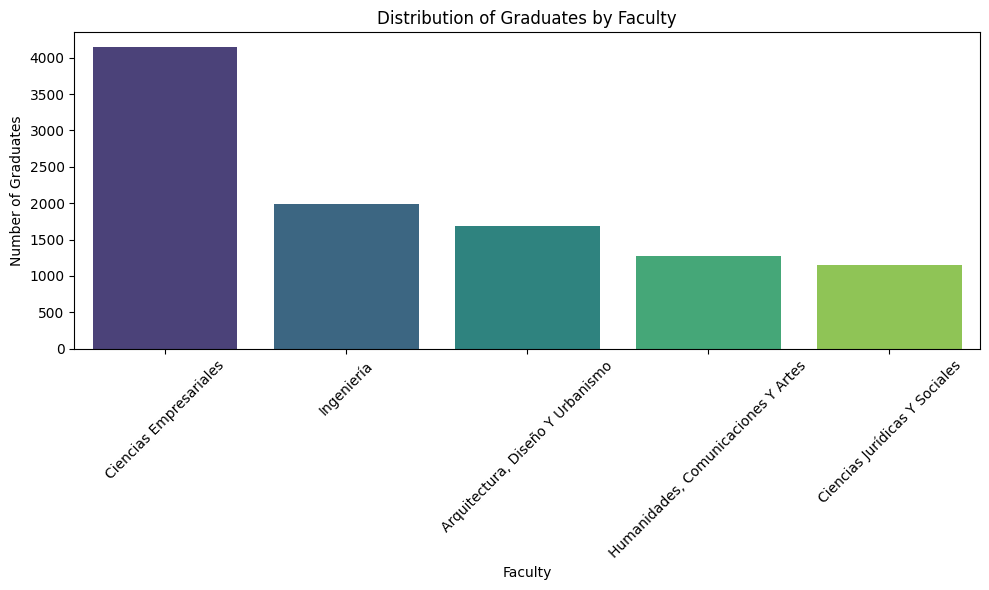

In [58]:
# Plot for the distribution of graduates by faculty
plt.figure(figsize=(10, 6))
sns.barplot(x=faculty_counts.index, y=faculty_counts.values, palette="viridis")
plt.title("Distribution of Graduates by Faculty")
plt.xlabel("Faculty")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# Distribution of graduates by career
career_counts = merged_dataframe["Carrera"].value_counts()
print("\nDistribution of graduates by career:")
print(career_counts)


Distribution of graduates by career:
Carrera
Ingeniería Comercial                        1477
Arquitectura                                1306
Derecho                                     1152
Administración De Empresas                  1058
Ingeniería Industrial Y De Sistemas          753
Comunicación Estratégica Y Corporativa       458
Ingeniería Económica                         441
Ingeniería Civil                             438
Auditoría Y Finanzas                         374
Ingeniería Financiera                        296
Ingeniería De Sistemas                       294
Decoración De Interiores Y Paisajismo        271
Comercio Internacional                       259
Psicología                                   235
Diseño Gráfico Y Publicitario                201
Marketing Y Publicidad                       201
Diseño Gráfico                               201
Ingeniería De Petróleo Y Gas Natural         188
Ingeniería Electrónica                       138
Diseño Y Gestión De La 

C:\Users\Jassiel\AppData\Local\Temp\ipykernel_10872\3152549734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=career_counts.index, x=career_counts.values, palette="viridis")


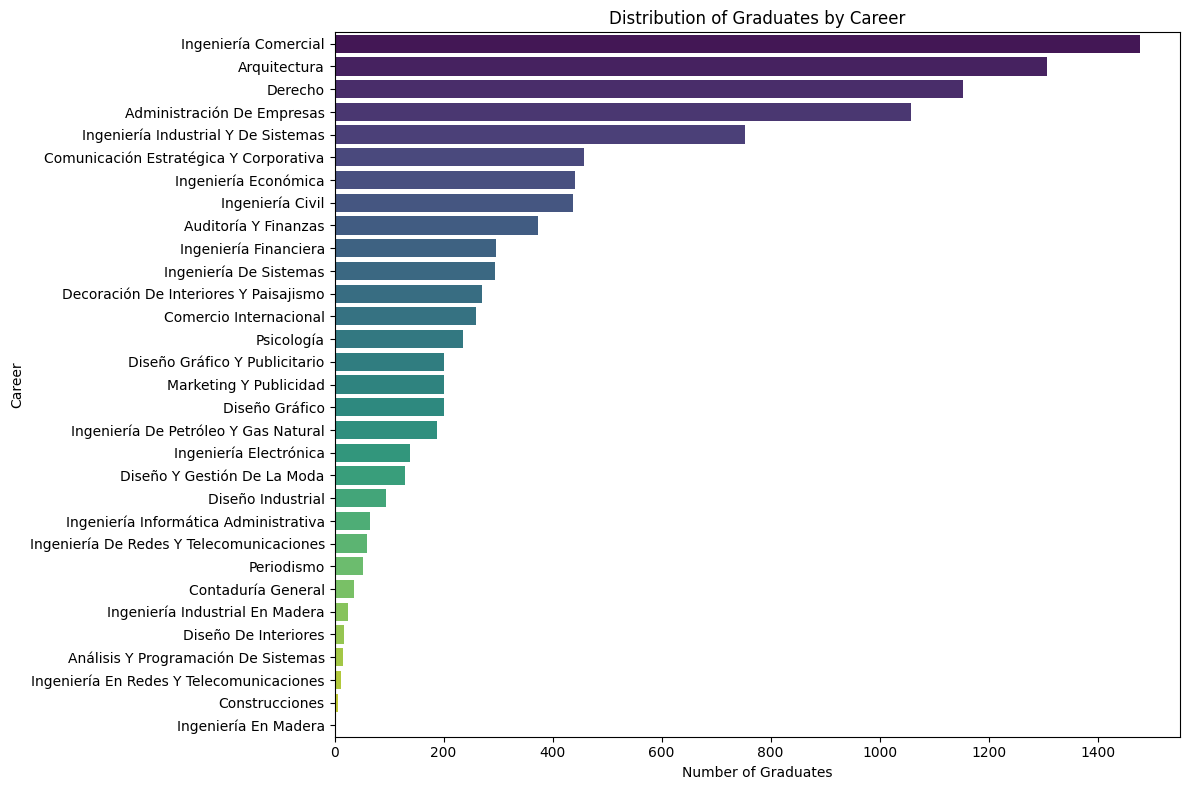

In [60]:
# Plot for the distribution of graduates by career
plt.figure(figsize=(12, 8))
sns.barplot(y=career_counts.index, x=career_counts.values, palette="viridis")
plt.title("Distribution of Graduates by Career")
plt.xlabel("Number of Graduates")
plt.ylabel("Career")
plt.tight_layout()
plt.show()